# Import Libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

label2int = {"ham": 0, "spam": 1}
int2label = {0: "ham", 1: "spam"}

# Exploratory Data Analysis

In [3]:
# the dataset was imported from UCI dataset
url = 'https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection'
messages = pd.read_csv(url, sep ='\t',names=["label", "message"])
messages[:30]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:30])

     label                                            message
103    ham  As per your request 'Melle Melle (Oru Minnamin...
154    ham  As per your request 'Melle Melle (Oru Minnamin...
207    ham  As I entered my cabin my PA said, '' Happy B'd...
223    ham                             Sorry, I'll call later
326    ham                   No calls..messages..missed calls
339    ham                             Sorry, I'll call later
357   spam  Congratulations ur awarded 500 of CD vouchers ...
444    ham                             Sorry, I'll call later
533    ham                  Gudnite....tc...practice going on
655    ham                       Did u got that persons story
658    ham               You will be in the place of that man
702    ham                             Sorry, I'll call later
768    ham                             Sorry, I'll call later
769    ham  I cant pick the phone right now. Pls send a me...
775    ham                         Just sleeping..and surfing
781    h

In [6]:
messages.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [7]:
# Get all the ham and spam emails
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']

# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

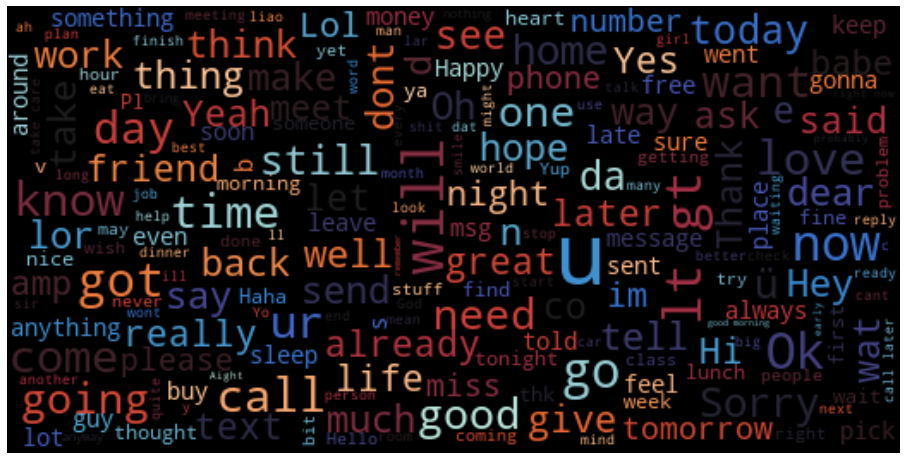

In [8]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='icefire').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

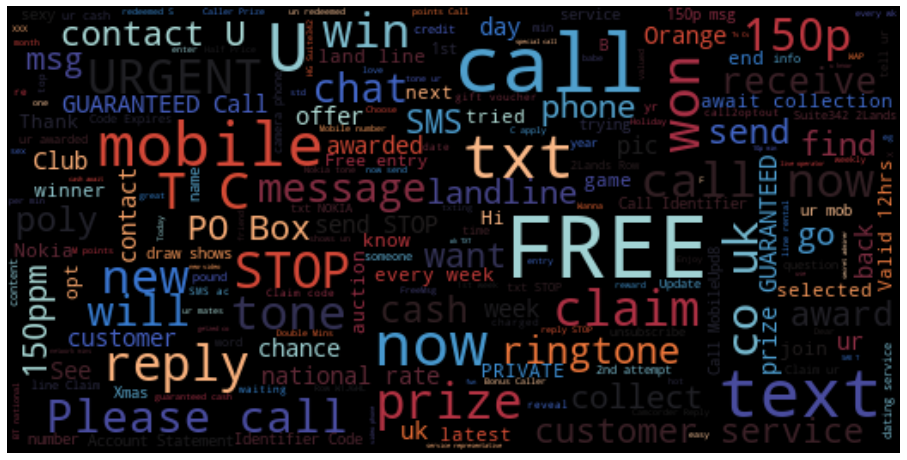

In [9]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='icefire_r').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


15.481865284974095

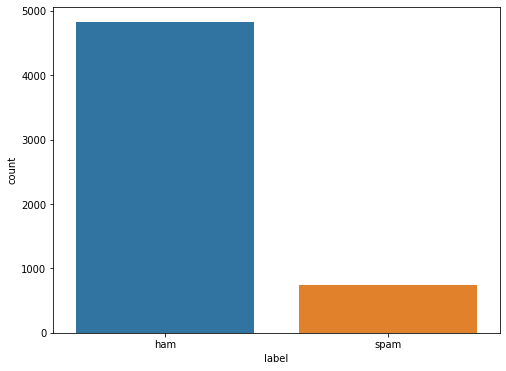

In [10]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(messages.label)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100 # 15.48%

In [11]:
# downsampling is used to fix the imbalance between spam and ham
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(747, 2) (747, 2)


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Message types')

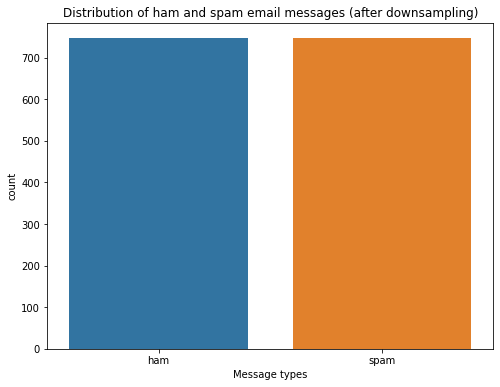

In [12]:
# Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [13]:
# Get length column for each text
msg_df['text_length'] = msg_df['message'].apply(len)

#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels

,text_length
label,
ham,73.238286
spam,138.670683


# Prepare train/test data and pre-process text

In [14]:
# Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values

# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.3, random_state=434)

## Tokenization

In [15]:
# Defining pre-processing hyperparameters
max_len = 40 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 1000

In [16]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [17]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 '2': 11,
 'now': 12,
 'and': 13,
 'is': 14,
 'free': 15,
 'or': 16,
 'on': 17,
 'in': 18,
 'ur': 19,
 '4': 20,
 'txt': 21,
 'have': 22,
 'me': 23,
 'are': 24,
 'with': 25,
 'from': 26,
 'of': 27,
 'get': 28,
 'text': 29,
 'just': 30,
 'my': 31,
 'stop': 32,
 'this': 33,
 'mobile': 34,
 'will': 35,
 'be': 36,
 'it': 37,
 'no': 38,
 'that': 39,
 'claim': 40,
 'send': 41,
 'can': 42,
 'we': 43,
 'not': 44,
 'so': 45,
 'only': 46,
 'reply': 47,
 'www': 48,
 'our': 49,
 'at': 50,
 'if': 51,
 'out': 52,
 'prize': 53,
 'do': 54,
 'go': 55,
 'but': 56,
 'cash': 57,
 'new': 58,
 '150p': 59,
 "i'm": 60,
 '1': 61,
 't': 62,
 'all': 63,
 'when': 64,
 '50': 65,
 'uk': 66,
 'please': 67,
 'week': 68,
 'won': 69,
 'com': 70,
 'nokia': 71,
 'win': 72,
 'tone': 73,
 'service': 74,
 'up': 75,
 'been': 76,
 'who': 77,
 'urgent': 78,
 'min': 79,
 'phone': 80,
 'love': 81,
 'time': 82,
 'contact': 8

In [18]:
# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 3836 unique tokens in training data. 


## Sequencing and Padding

In [19]:
# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [20]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (1045, 40)
Shape of testing tensor:  (449, 40)


In [21]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(18, 24)

In [22]:
# After padding
len(training_padded[0]), len(training_padded[1])

(40, 40)

In [23]:
print(training_padded[0])

[  5 403 877   1 459  13   1  63   1 104   1 169 878   1  13  60  63 225
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]


# Dense Spam Detection Model

In [24]:
vocab_size = 1000 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [25]:
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='sigmoid'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
____________________________________________________

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

# Training and evaluating the Dense model

In [28]:
# fitting a dense spam detector model

num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
33/33 - 2s - loss: 0.7082 - accuracy: 0.4890 - val_loss: 0.6884 - val_accuracy: 0.5033 - 2s/epoch - 57ms/step
Epoch 2/30
33/33 - 1s - loss: 0.6910 - accuracy: 0.5502 - val_loss: 0.6766 - val_accuracy: 0.8263 - 508ms/epoch - 15ms/step
Epoch 3/30
33/33 - 1s - loss: 0.6786 - accuracy: 0.5837 - val_loss: 0.6533 - val_accuracy: 0.8374 - 504ms/epoch - 15ms/step
Epoch 4/30
33/33 - 0s - loss: 0.6397 - accuracy: 0.6450 - val_loss: 0.6202 - val_accuracy: 0.8419 - 491ms/epoch - 15ms/step
Epoch 5/30
33/33 - 0s - loss: 0.5954 - accuracy: 0.7426 - val_loss: 0.5767 - val_accuracy: 0.8419 - 495ms/epoch - 15ms/step
Epoch 6/30
33/33 - 0s - loss: 0.5585 - accuracy: 0.7799 - val_loss: 0.5304 - val_accuracy: 0.8419 - 496ms/epoch - 15ms/step
Epoch 7/30
33/33 - 0s - loss: 0.5017 - accuracy: 0.8220 - val_loss: 0.4850 - val_accuracy: 0.8463 - 493ms/epoch - 15ms/step
Epoch 8/30
33/33 - 0s - loss: 0.4465 - accuracy: 0.8699 - val_loss: 0.4441 - val_accuracy: 0.8486 - 487ms/epoch - 15ms/step
Epoch 9/30


In [29]:
# Model performance on test data 
model.evaluate(testing_padded, test_labels)

15/15 [==============================] - 0s 9ms/step - loss: 0.1349 - accuracy: 0.9555


[0.13491733372211456, 0.955456554889679]

In [30]:
# get the loss and metrics
result = model.evaluate(testing_padded, test_labels)

# extract those
loss = result[0]
accuracy = result[1]

print(f"[+] Accuracy: {accuracy*100:.2f}%")

15/15 [==============================] - 0s 10ms/step - loss: 0.1349 - accuracy: 0.9555
[+] Accuracy: 95.55%


In [31]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

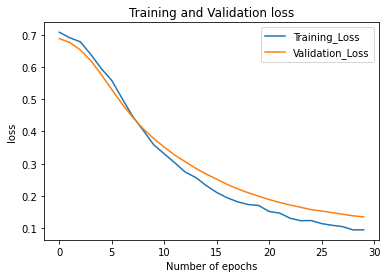

In [32]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

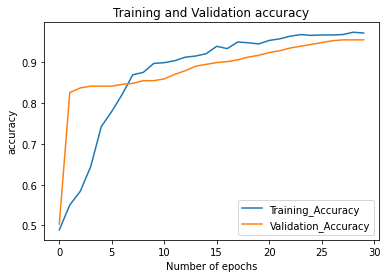

In [33]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

# Predict spam/ham on new messages

## Using text from dataset

In [34]:
# display long string 
pd.options.display.max_colwidth=100
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


In [35]:
text = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
               "U dun say so early hor... U c already then say...",
               "Nah I don't think he goes to usf, he lives around here though",
               "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...",
               "Even my brother is not like to speak with me. They treat me like aids patent.",
               "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...",
               "WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...",
               "Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came..."]                        

In [36]:
def get_predictions(text):
    sequence = tokenizer.texts_to_sequences([text])
    # pad the sequence
    padded = pad_sequences(sequence, padding=padding_type, maxlen=max_len)
    # get the prediction
    prediction = model.predict(padded)
    # one-hot encoded vector, revert using np.argmax
    return int2label[np.argmax(prediction)]

In [37]:
print(get_predictions(text))

1/1 [==============================] - 0s 114ms/step
ham


In [38]:
#Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(text)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_len)           

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more likely that the message is spam
for x in range(len(text)):
    print(text[x])
    print(classes[x])
    print('\n')

1/1 [==============================] - 0s 27ms/step
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
[0.10730218]


Ok lar... Joking wif u oni...
[0.02651861]


Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
[0.9968935]


U dun say so early hor... U c already then say...
[0.01972604]


Nah I don't think he goes to usf, he lives around here though
[0.02356706]


FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...
[0.39937362]


Even my brother is not like to speak with me. They treat me like aids patent.
[0.03790513]


As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...
[0.61781406]


WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...
[0.9524485]


Had your mobile 11 months o

In [39]:
# Defining prediction function
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))

## Using new text message

In [40]:
# The first one gives 0.99 indicating very high probabilty of spam
predict_msg = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...",
               "Call me",
          "What's up?",
              "How are ?"]
predict_spam(predict_msg)

1/1 [==============================] - 0s 27ms/step


array([[0.98402274],
       [0.05200109],
       [0.04049055],
       [0.03216027]], dtype=float32)

In [46]:
#saving the model
model.save("C:/Users/USER/Desktop/Spam_detection")

INFO:tensorflow:Assets written to: C:/Users/USER/Desktop/Spam_detection\assets


In [45]:
# Evaluating the saved model
!saved_model_cli show --dir {"C:/Users/USER/Desktop/Spam_detection"} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['embedding_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 40)
        name: serving_default_embedding_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          inputs: T